### Import Libaries

In [2]:
import pandas as pd 
import time
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [3]:
df3 = pd.read_csv('C:/Users/60004501/Documents/Lagos_Rent_Prediction_Proj/house_price_cleaned_data.csv')
df3.head()

,price,num_bedrooms,num_bathrooms,num_toilet,location,property_type
0,5000000,4,4,5,ikeja gra,4 BEDROOM TERRACED DUPLEX HOUSE FOR RENT IKEJA...
1,7500000,3,3,3,old ikoyi,3 BEDROOM FLAT
2,7500000,2,2,2,banana island,2 BEDROOM FLAT
3,9500000,3,3,3,banana island,3 BEDROOM FLAT
4,20000000,6,6,6,old ikoyi,6 BEDROOM PENTHOUSE FLAT


## Exploratory Data Analysis

In [8]:
#Number of bedroom in SELF contain/Miniflat are assigned 0. Changed to 1, because self contain and Miniflats in Lagos have a Min
# of 1 BEDROOM
df3.num_bedrooms = df3.num_bedrooms.apply(lambda x: 1 if x == 0 else x )

In [9]:
df3.describe()

,price,num_bedrooms,num_bathrooms,num_toilet
count,8.242000e+03,8242.000000,8242.000000,8242.000000
mean,1.471363e+07,2.593545,2.574982,3.017835
std,3.926576e+08,1.319874,1.348873,1.678446
min,1.000000e+00,1.000000,0.000000,0.000000
25%,6.500000e+05,1.000000,1.000000,2.000000
50%,1.300000e+06,3.000000,3.000000,3.000000
75%,3.500000e+06,3.000000,3.000000,4.000000
max,2.500000e+10,10.000000,10.000000,10.000000


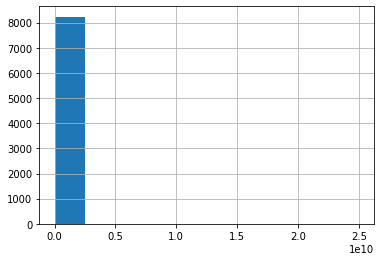

In [12]:
df3.price.hist()
#The distribution above clearly shows our price column is skewed, hence not evenly distributed.

### Outlier Detection and Removal

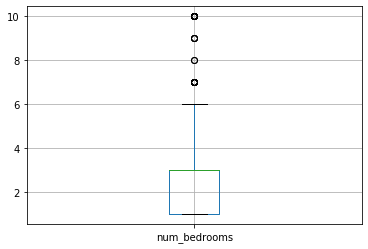

In [16]:
df3.boxplot('num_bedrooms')

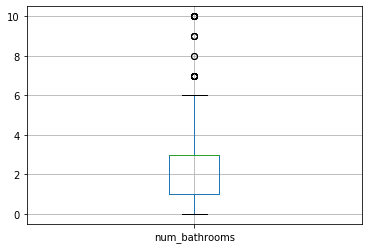

In [17]:
df3.boxplot('num_bathrooms')

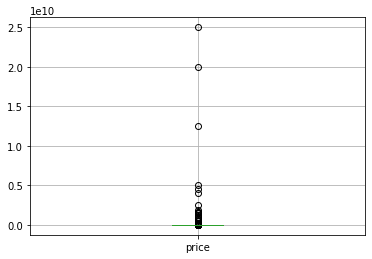

In [18]:
df3.boxplot('price')

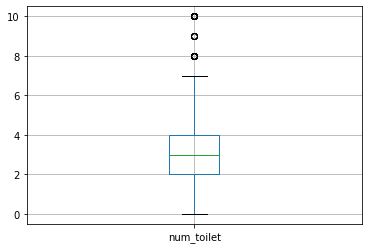

In [19]:
df3.boxplot('num_toilet')

In [11]:
#Calling the Describe method, we can see prices going for as low as 1Naira (lower bound Outlier). Need to be taken out
df3[df3.price==1]

,price,num_bedrooms,num_bathrooms,num_toilet,location,property_type
5599,1,3,3,4,thomas estate,3 BEDROOM HOUSE FOR RENT THOMAS ESTATE AJAH LAGOS
5685,1,3,3,2,other,3 BEDROOM FLAT
6028,1,3,3,4,ajah lagos,3 BEDROOM HOUSE FOR RENT AJAH LAGOS
6047,1,3,3,4,abraham adesanya,3 BEDROOM HOUSE FOR RENT ABRAHAM ADESANYA ESTA...
6059,1,3,3,4,ikota lekki,3 BEDROOM HOUSE FOR RENT IKOTA LEKKI LAGOS
6306,1,2,2,3,thomas estate,2 BEDROOM BLOCKS OF FLATS HOUSE FOR RENT THOMA...
6913,1,3,3,4,thomas estate,3 BEDROOM BLOCKS OF FLATS HOUSE FOR RENT THOMA...
7270,1,3,3,3,thomas estate,3 BEDROOM BLOCKS OF FLATS HOUSE FOR RENT THOMA...
8092,1,3,3,4,other,3 BEDROOM BLOCKS OF FLATS HOUSE FOR RENT GRACE...


In [13]:
#Taking out the Outliers
df3[df3.price!=1]

,price,num_bedrooms,num_bathrooms,num_toilet,location,property_type
0,5000000,4,4,5,ikeja gra,4 BEDROOM TERRACED DUPLEX HOUSE FOR RENT IKEJA...
1,7500000,3,3,3,old ikoyi,3 BEDROOM FLAT
2,7500000,2,2,2,banana island,2 BEDROOM FLAT
3,9500000,3,3,3,banana island,3 BEDROOM FLAT
4,20000000,6,6,6,old ikoyi,6 BEDROOM PENTHOUSE FLAT
...,...,...,...,...,...,...
8237,8500000,3,3,4,admiralty way,3 BEDROOM FLAT
8238,300000,1,1,1,mende maryland,1 BEDROOM MINI FLAT SELF CONTAIN FLAT
8239,4000000,6,6,7,other,6 BEDROOM DETACHED DUPLEX HOUSE FOR RENT ADELA...
8240,700000,1,1,1,other,SHARED APARTMENT FLAT


In [14]:
#Calling the Describe method, we can see prices going for as high as 100 billion Naira (upper bound Outlier). Need to be taken out
df3[df3.price>=1000000000]

,price,num_bedrooms,num_bathrooms,num_toilet,location,property_type
1146,12500000000,3,3,3,victoria island,3 BEDROOM BLOCKS OF FLATS HOUSE FOR RENT VICTO...
3395,1500000000,4,4,5,other,4 BEDROOM FLAT
4268,25000000000,1,1,2,other,1 BEDROOM MINI FLAT HOUSE FOR RENT OFF ISHAGA ...
4412,1900000000,3,3,4,other,3 BEDROOM FLAT
4509,1000000000,2,2,3,other,2 BEDROOM BLOCKS OF FLATS HOUSE FOR RENT @OFF ...
4678,4500000000,4,4,5,chevron lekki,4 BEDROOM DETACHED DUPLEX HOUSE FOR RENT CHEVR...
4684,2500000000,10,10,10,other,10 BEDROOM WAREHOUSE COMMERCIAL PROPERTY FOR R...
5025,1500000000,3,3,4,other,3 BEDROOM FLAT
5259,1500000000,4,4,5,unity estate,4 BEDROOM DETACHED BUNGALOW HOUSE FOR RENT UNI...
5405,1600000000,3,3,4,other,3 BEDROOM FLAT


In [21]:
# Taking values within price range of 5% and 98%
min_threshold,max_threshold = df3['price'].quantile([0.05,0.98])
min_threshold,max_threshold 

(300000.0, 25000000.0)

In [22]:
df4 = df3[(df3['price']<max_threshold) & (df3['price']>min_threshold)]

In [23]:
df4.head(10)

,price,num_bedrooms,num_bathrooms,num_toilet,location,property_type
0,5000000,4,4,5,ikeja gra,4 BEDROOM TERRACED DUPLEX HOUSE FOR RENT IKEJA...
1,7500000,3,3,3,old ikoyi,3 BEDROOM FLAT
2,7500000,2,2,2,banana island,2 BEDROOM FLAT
3,9500000,3,3,3,banana island,3 BEDROOM FLAT
4,20000000,6,6,6,old ikoyi,6 BEDROOM PENTHOUSE FLAT
5,15000000,3,3,3,victoria island,3 BEDROOM BLOCKS OF FLATS HOUSE FOR RENT VICTO...
6,10000000,2,2,2,victoria island,2 BEDROOM FLAT
7,15000000,4,4,4,old ikoyi,4 BEDROOM PENTHOUSE FLAT
8,17000000,4,4,4,ahmadu bello,4 BEDROOM PENTHOUSE FLAT
9,15000000,4,4,4,victoria island,4 BEDROOM DETACHED DUPLEX HOUSE FOR RENT VICTO...


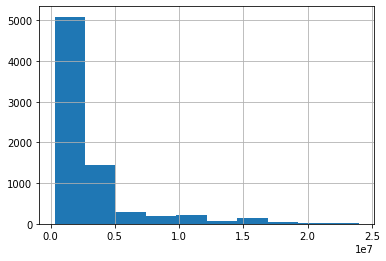

In [24]:
df4.price.hist()

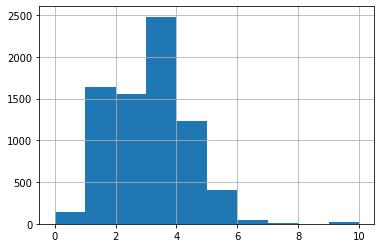

In [25]:
df4.num_bathrooms.hist()

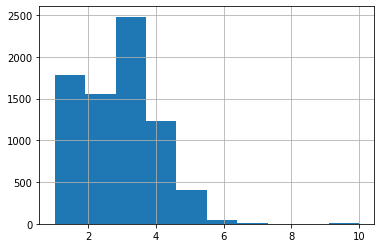

In [28]:
df4.num_bedrooms.hist()

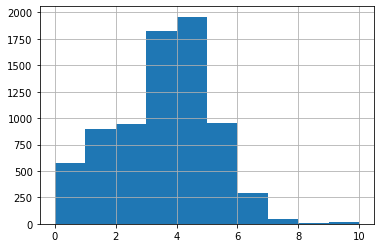

In [29]:
df4.num_toilet.hist()

In [31]:
df4[['price', 'num_bedrooms', 'num_bathrooms', 'num_toilet']].corr()

,price,num_bedrooms,num_bathrooms,num_toilet
price,1.000000,0.466485,0.457538,0.376249
num_bedrooms,0.466485,1.000000,0.994625,0.862376
num_bathrooms,0.457538,0.994625,1.000000,0.868461
num_toilet,0.376249,0.862376,0.868461,1.000000


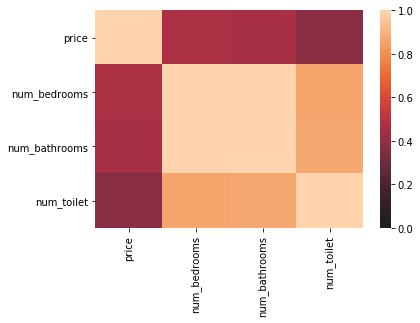

In [35]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(df4[['price', 'num_bedrooms', 'num_bathrooms', 'num_toilet']].corr(), vmin = 0, vmax = 1)

[Text(0, 0, 'ikeja gra'),
 Text(0, 0, 'old ikoyi'),
 Text(0, 0, 'banana island'),
 Text(0, 0, 'victoria island'),
 Text(0, 0, 'ahmadu bello'),
 Text(0, 0, 'off adeola'),
 Text(0, 0, 'off kingsway'),
 Text(0, 0, 'bourdillon old'),
 Text(0, 0, 'other'),
 Text(0, 0, 'ikoyi lagos'),
 Text(0, 0, 'lekki phase'),
 Text(0, 0, 'ikate lekki'),
 Text(0, 0, 'eko atlantic'),
 Text(0, 0, 'off alexander'),
 Text(0, 0, 'adeola odeku'),
 Text(0, 0, 'bourdillon ikoyi'),
 Text(0, 0, 'chevron lekki'),
 Text(0, 0, 'lekki county'),
 Text(0, 0, 'oniru victoria'),
 Text(0, 0, 'ikate elegushi'),
 Text(0, 0, 'toyin street'),
 Text(0, 0, 'allen avenue'),
 Text(0, 0, 'agungi lekki'),
 Text(0, 0, 'osapa london'),
 Text(0, 0, 'ajah lagos'),
 Text(0, 0, 'platinum estate'),
 Text(0, 0, 'off ifako'),
 Text(0, 0, 'osborne foreshore'),
 Text(0, 0, 'parkview estate'),
 Text(0, 0, 'millenuim ups'),
 Text(0, 0, 'medina gbagada'),
 Text(0, 0, 'arowojobe estate'),
 Text(0, 0, 'soluyi gbagada'),
 Text(0, 0, 'anthony village')

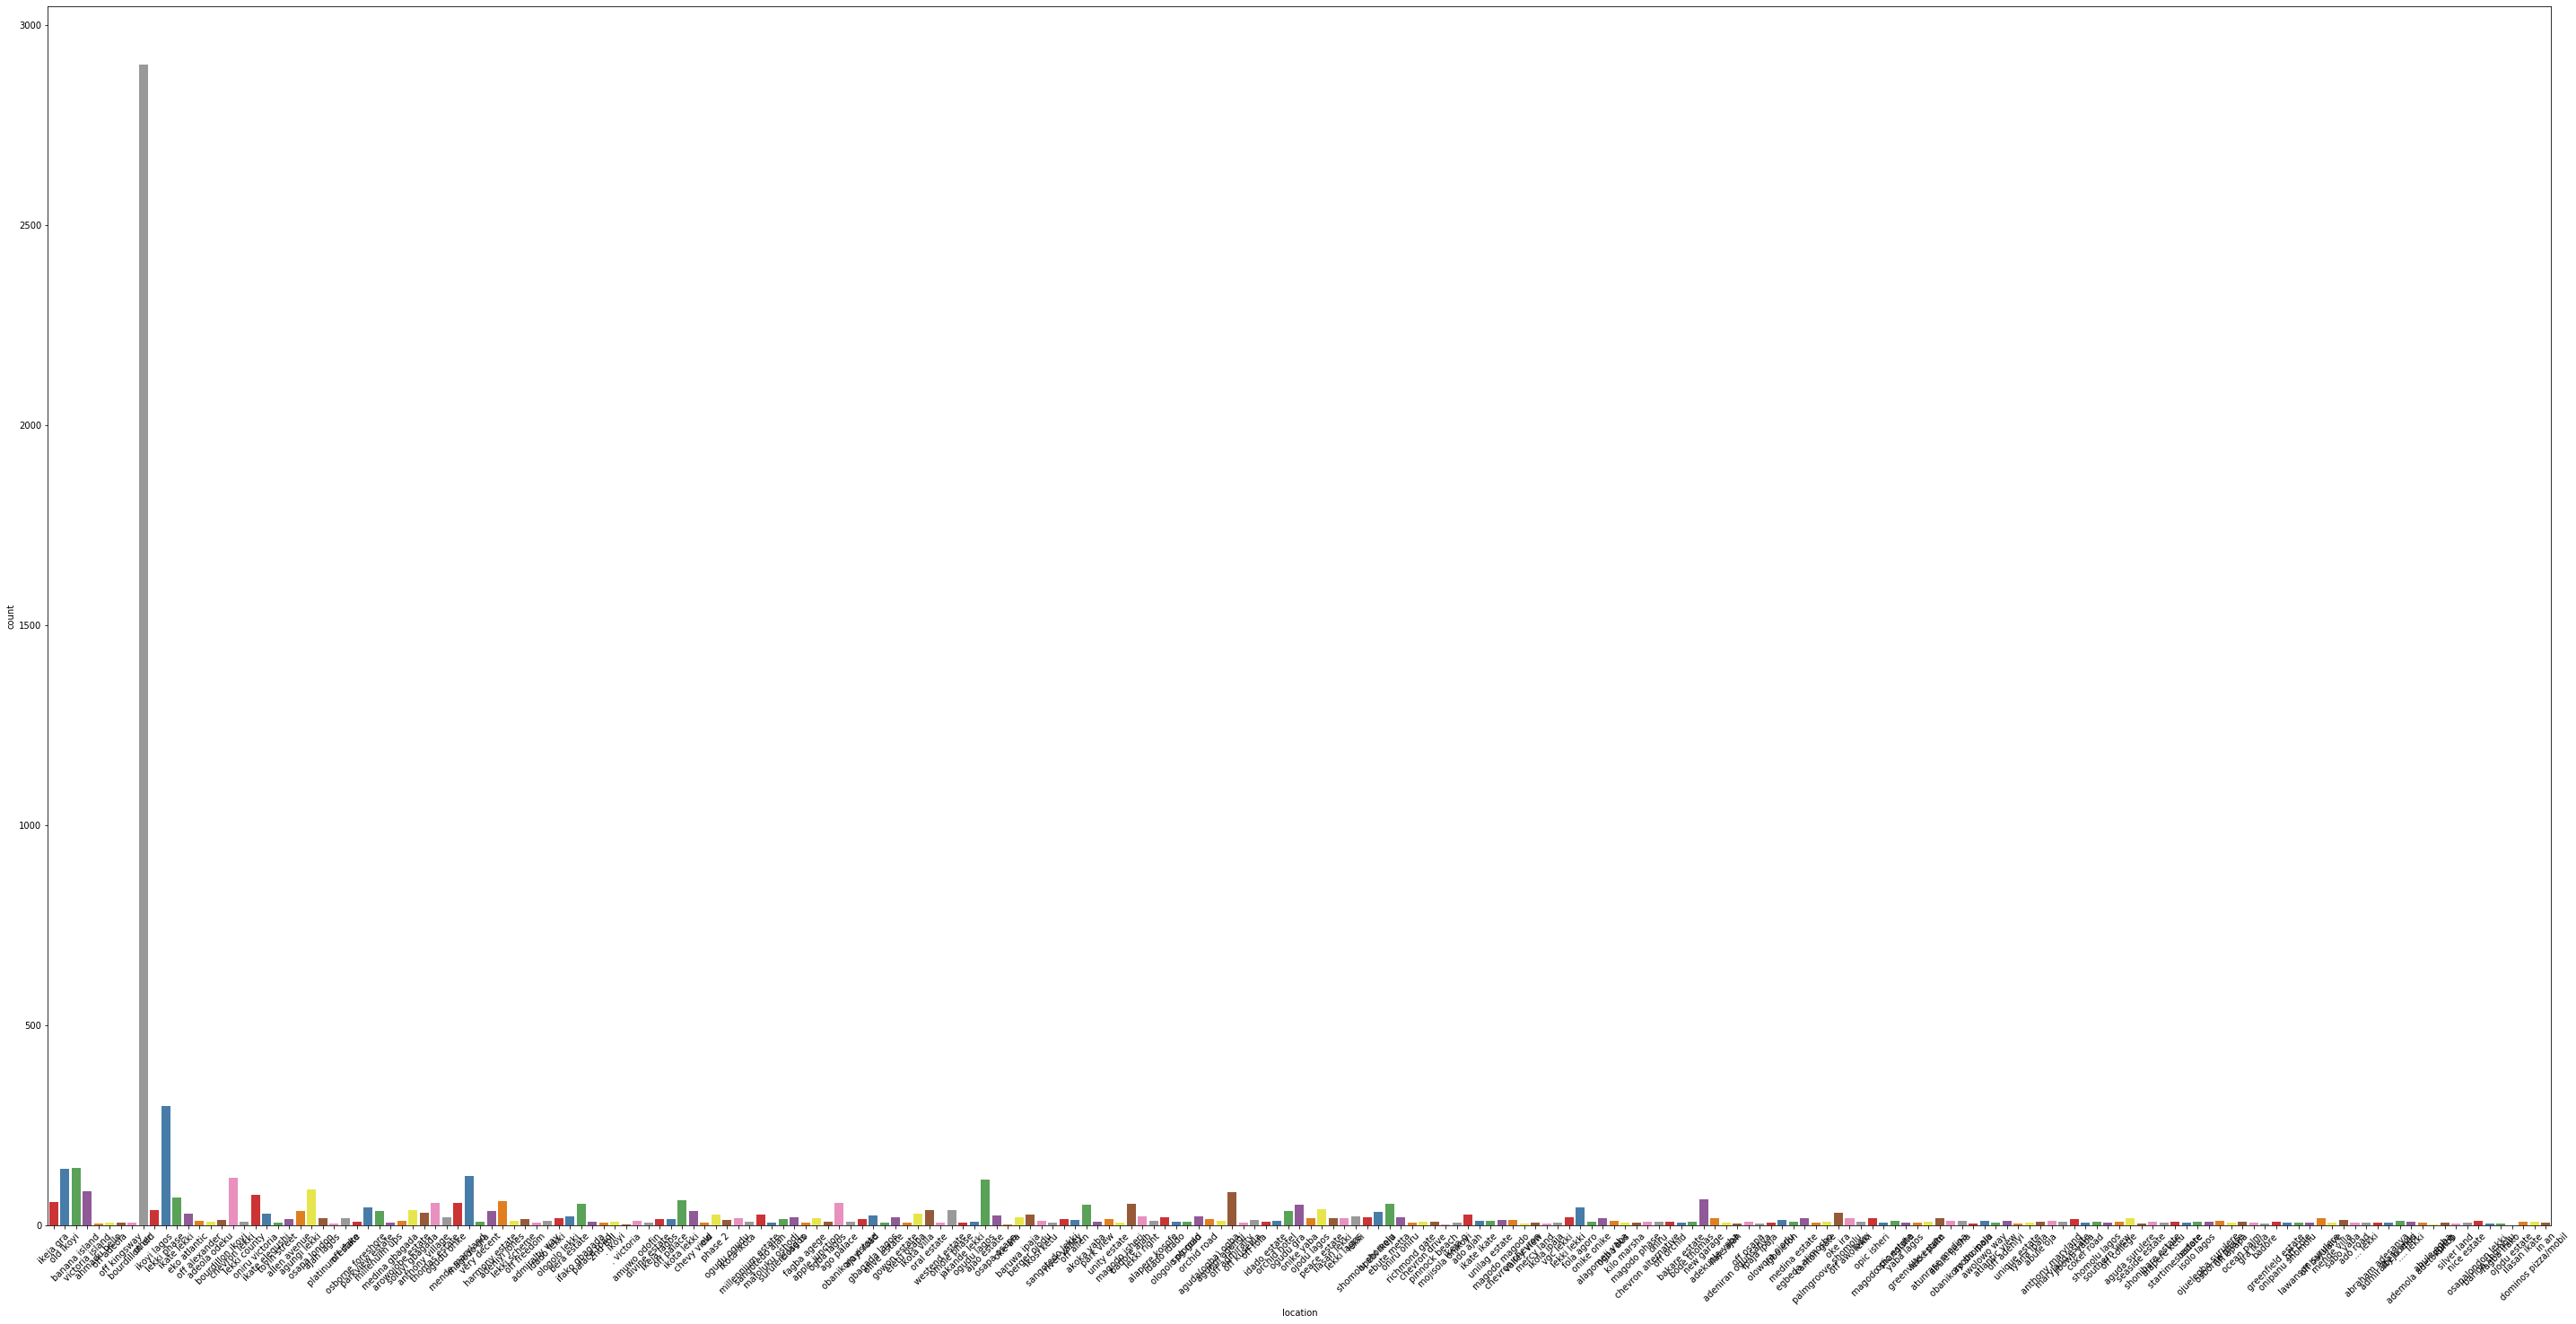

In [41]:
import seaborn as sns
plt.figure(figsize=(50,25))
chart = sns.countplot(
    data=df4,
    x='location',
    palette='Set1'
)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)

In [55]:
df5 = df4[df4.location != 'other']

In [56]:
len(df5)

4625